In [1]:
import plotnine as gg
import plydata
from movielens.datasets import RatingData

# RATING

In [2]:
ds = RatingData()
ds.df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,7.003114,1.205946e+09
std,182.618491,35530.987199,2.085058,2.162610e+08
min,1.000000,1.000000,1.000000,8.281246e+08
25%,177.000000,1199.000000,6.000000,1.019124e+09
50%,325.000000,2991.000000,7.000000,1.186087e+09
75%,477.000000,8122.000000,8.000000,1.435994e+09
max,610.000000,193609.000000,10.000000,1.537799e+09


## Time

/home/gram/.local/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 40'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


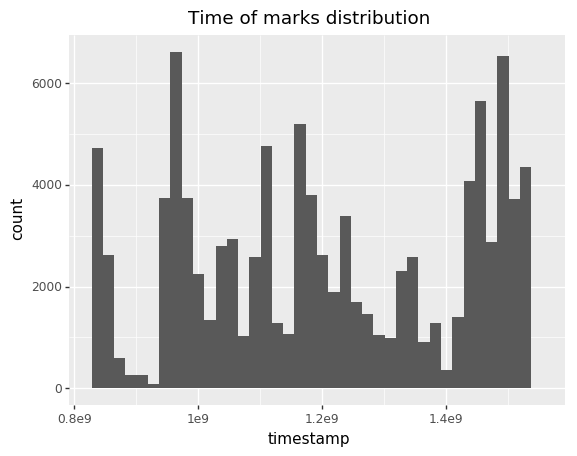

<ggplot: (-9223363266909748855)>

In [3]:
gg.ggplot(ds.df) + gg.geom_histogram(gg.aes(x='timestamp')) + gg.ggtitle('Time of marks distribution')

In [4]:
from datetime import datetime

In [5]:
dt = datetime.fromtimestamp(min(ds.df.timestamp))
print('First mark time: {}'.format(dt))
dt = datetime.fromtimestamp(max(ds.df.timestamp))
print('Latest mark time: {}'.format(dt))

First mark time: 1996-03-29 21:36:55
Latest mark time: 2018-09-24 17:27:30


In [6]:
c = ds.df.timestamp.value_counts()
c[:5]

1459787998    128
1459787997    124
1459787996     85
1459787995     37
828124616      37
Name: timestamp, dtype: int64

In [7]:
filtered = ds.df[(ds.df.timestamp > 1459787998 - 120) & (ds.df.timestamp < 1459787998 + 120)]

print(filtered.movieId.value_counts()[:5])
print(filtered.userId.value_counts()[:5])

93363    1
98243    1
69275    1
3751     1
3752     1
Name: movieId, dtype: int64
534    392
Name: userId, dtype: int64


Wow, somebody generates 392 marks by 4 minutes. All marks to the different movies.

In [8]:
def get_chunks(seq, size):
    return (seq[pos:pos + size] for pos in range(0, len(seq), size))

bad_users = set()
seconds = 500
for chunk in get_chunks(ds.df, seconds):
    cnts = chunk.userId.value_counts()
    for user_id, cnt in cnts.items():
        if cnt > 490:
            bad_users.add(user_id)
            print('User', user_id, 'generated', cnt, 'marks in', seconds, 'seconds')

print('\nBad users:', ', '.join(map(str, sorted(bad_users))))

User 68 generated 500 marks in 500 seconds
User 68 generated 500 marks in 500 seconds
User 177 generated 500 marks in 500 seconds
User 182 generated 500 marks in 500 seconds
User 217 generated 498 marks in 500 seconds
User 232 generated 500 marks in 500 seconds
User 249 generated 500 marks in 500 seconds
User 274 generated 500 marks in 500 seconds
User 274 generated 500 marks in 500 seconds
User 288 generated 500 marks in 500 seconds
User 305 generated 500 marks in 500 seconds
User 307 generated 500 marks in 500 seconds
User 318 generated 500 marks in 500 seconds
User 380 generated 500 marks in 500 seconds
User 380 generated 500 marks in 500 seconds
User 387 generated 500 marks in 500 seconds
User 414 generated 500 marks in 500 seconds
User 414 generated 500 marks in 500 seconds
User 414 generated 500 marks in 500 seconds
User 414 generated 500 marks in 500 seconds
User 414 generated 492 marks in 500 seconds
User 448 generated 500 marks in 500 seconds
User 448 generated 500 marks in 50

By one mark every second. Ok. Nobody jumps out as suspicious, lol. We should have serious talk to these people. Let's exclude them.

In [9]:
ds.df = ds.df[~ds.df.userId.isin(bad_users)]

## Marks

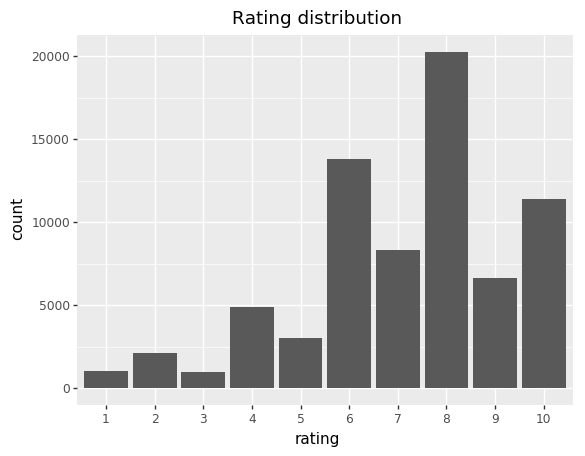

<ggplot: (8769945255502)>

In [10]:
(
    gg.ggplot(ds.df, gg.aes(x='factor(rating)')) 
    + gg.geom_bar()
    + gg.xlab('rating')
    + gg.ggtitle('Rating distribution')
)

/home/gram/.local/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/home/gram/.local/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


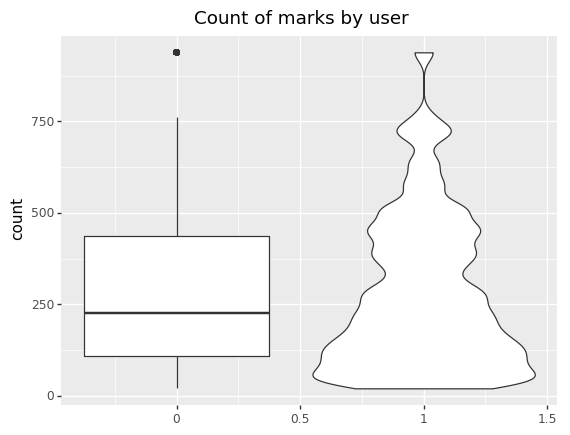

<ggplot: (-9223363266909520177)>

In [11]:
chart = (
    ds.df
    >> plydata.group_by('userId')
    >> plydata.add_count()
    >> gg.ggplot()
    + gg.geom_violin(gg.aes(x=1, y='n'))
    + gg.xlab('')
    + gg.ylab('count')
    + gg.ggtitle('Count of marks by user')
)
chart + gg.geom_boxplot(gg.aes(x=0, y='n'))

Somebody has looked almost 3k movies. It's about half a year without breaks. But now you can't see this user on this chart because he was in list of bad users.

Let's look closer to bottom of chart.

/home/gram/.local/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


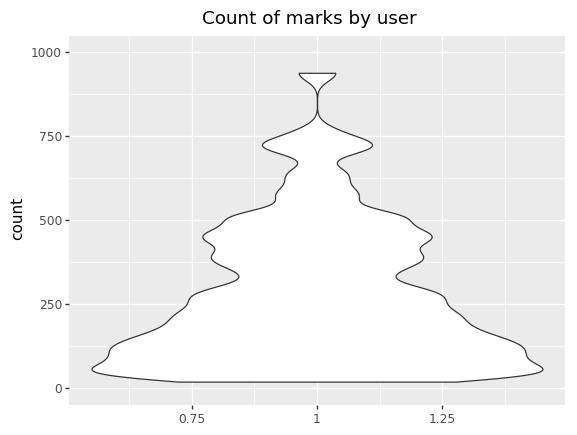

<ggplot: (-9223363266909539994)>

In [12]:
chart + gg.ylim(0, 1000)

/home/gram/.local/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/home/gram/.local/lib/python3.7/site-packages/plotnine/layer.py:360: UserWarning: stat_ydensity : Removed 11792 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


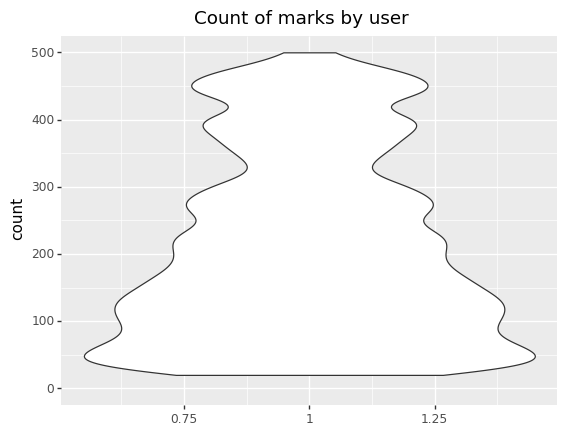

<ggplot: (8769945136427)>

In [13]:
chart + gg.ylim(0, 500)

1. Most of users mark less than ~500 movies.
1. Every user has at least 20 marks. I think, MovieLens just filters users with less than 20 marks. Lets check it:

In [14]:
min((ds.df >> plydata.group_by('userId') >> plydata.add_count())['n'])

20

Yeah, right. So, MovieLens already choose for us list of users that we can use for models fit because 20 movies already enough to make user profile.

    userId  n  rating
52      53  1      10


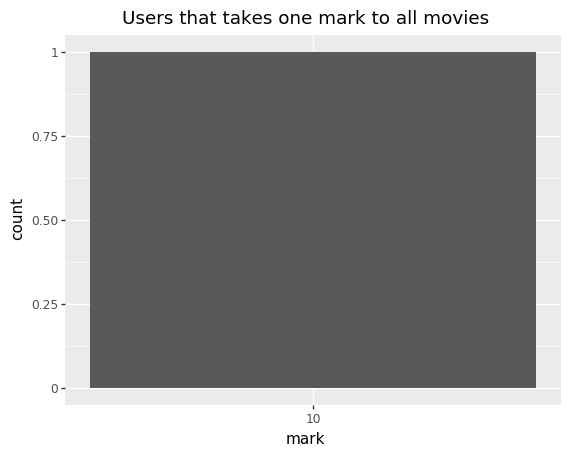

<ggplot: (8769945099328)>

In [15]:
tmp = (
    ds.df
    >> plydata.group_by('userId')
    >> plydata.summarize(n='len(set(rating))', rating='max(rating)')
)
tmp = tmp[tmp['n'] == 1]
print(tmp)

(
    gg.ggplot(tmp, gg.aes(x='factor(rating)'))
    + gg.geom_bar()
    + gg.xlab('mark')
    + gg.ylab('count')
    + gg.ggtitle('Users that takes one mark to all movies')
)

Only one user rates all movies with one mark. So, we can ignore this case.

## Missed values

In [19]:
ds.df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Great! We have no missed values. Of course.

In [16]:
set(range(min(ds.users), max(ds.users) + 1)) - set(ds.users) - set(bad_users)

set()

Users IDs sequented, without missed values. Obviusly, this is because MovieLens masks these IDs. So, we can't use it as feature. Otherwise, we would get approximated registration date. However, if we really need this feature, we can just get time of first mark. 

In [17]:
expected = set(range(min(ds.movies), max(ds.movies) + 1))
values = expected - set(ds.movies)
missed = len(values)
print('Missed {} values from {} ({:.2f}%)'.format(
    missed, 
    len(expected), 
    missed / len(expected) * 100,
))

Missed 186229 values from 193609 (96.19%)


Most of movie IDs are missed. So, for movies we have real IDs, and 96% of movies isn't rated.